# Random Graphs

In [1]:
using Plots
using LightGraphs
using Statistics: mean
using Combinatorics: combinations

In [2]:
Threads.nthreads()

8

## Average Properties of random graphs

> Erdos and Renyi proved that many important properties of a graph **appear suddenly**. This means that, while a random graph with $N$ nodes and a certain number of edges is unlikely to have a given property at hand, a random graph with a few more edges is likely to have that property.

In [3]:
N = 10_000
nodes = 1:N
# Maximum number of connections
M = N * (N - 1) / 2

4.9995e7

In [4]:
"""
Simulate an Erdos-Renyi model A     
"""
function er_model_a(N, p)
    nodes = 1:N
    G = SimpleGraph(N)
    for (n1, n2) in combinations(nodes, 2)
        if p > rand()
            add_edge!(G, n1, n2)
        end
    end
    return G
end

"""
Compute the proportion of nodes in the largest component
of an Erdos-Renyi
"""
function in_largest_component(N, p)
    G = er_model_a(N, p)
    components = connected_components(G)
    vmax, idxmax = findmax([length(component) for component in components])
    return vmax / N
end

"""
Implement the bisection method to find the root
of a function, i.e., find x such that f(x) = 0.
To do so, the function requires a, b in R such that
(f(a) > 0 and f(b) < 0) or ((f(a) < 0 and f(b) > 0))
"""
function bisection(f, a, b; tol=1e-10)
    c = (a + b) / 2
    err = Inf
    
    while err > tol
        c = (a + b) / 2
        fc = f(c)
        
        if sign(fc) == sign(f(a))
            a = c
        else
            b = c
        end
        
        err = abs(fc)
    end
    return c
end

function S(z) = z <= 1 ? 0 : bisection(S -> S - (1 - exp(-z * S)), 1e-3, 1.1)

bisection

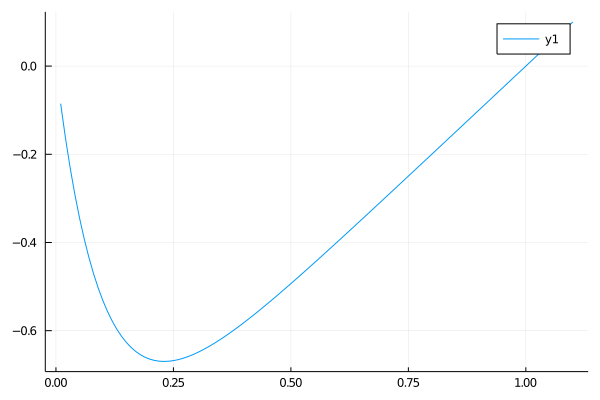

In [5]:
z = 10
Svals = 0.01:0.01:1.1
plot(Svals, Svals .- (1 .- exp.(-z .* Svals)))
hline!(0)

In [6]:
function S(z)
    if z <= 1
        return 0.0
    else
        return bisection(S -> S - (1 - exp(-z * S)), 1e-3, 1.1)
    end
end

S (generic function with 1 method)

For example, we consider the property

In [26]:
k_values = 0:0.05:5
nk_values = length(k_values)
n_sims = 5
Q_values = zeros(nk_values, n_sims)

@time begin
    Threads.@threads for ix=1:nk_values
        k = k_values[ix]
        p = k / N
        for nsim=1:n_sims
            Q_samp = in_largest_component(N, p)
            Q_values[ix, nsim] = Q_samp
        end
    end
end

886.846139 seconds (50.51 G allocations: 2.940 TiB, 48.38% gc time)


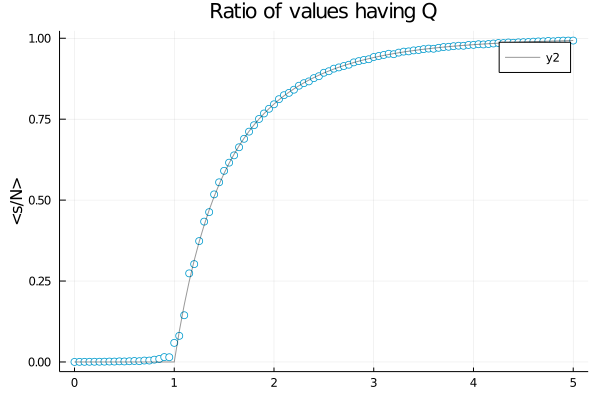

In [32]:
S_values = S.(k_values)

scatter(k_values, mean(Q_values, dims=2), label=nothing, markercolor=:white, markerstrokecolor=:deepskyblue3)
plot!(k_values, S_values, color="black", alpha=0.4)
plot!(title="Ratio of values having Q", ylabel="<s/N>")